In [1]:
import sys
sys.path.append("../src/")
from utils import *

import pandas as pd
import geopandas as gpd
from shapely import wkt
import warnings
warnings.filterwarnings("ignore")

In [2]:
bnd_count = gpd.read_file("../data/시각화데이터/bnd_count.csv")
silver_index_bot20_within_bnd = gpd.read_file("../data/시각화데이터/silver_index_bot20_within_bnd.csv")
facility_index_bot20_within_bnd = gpd.read_file("../data/시각화데이터/facility_index_bot20_within_bnd.csv")

bnd_count['geometry'] = bnd_count['geometry'].apply(wkt.loads)
bnd_count = gpd.GeoDataFrame(bnd_count, geometry="geometry")
bnd_count[["silver_ADM_count", "silver_SGG_count", "facility_ADM_count", "facility_SGG_count"]] = bnd_count[["silver_ADM_count", "silver_SGG_count", "facility_ADM_count", "facility_SGG_count"]].astype(float)

silver_index_bot20_within_bnd['geometry'] = silver_index_bot20_within_bnd['geometry'].apply(wkt.loads)
silver_index_bot20_within_bnd = gpd.GeoDataFrame(silver_index_bot20_within_bnd, geometry="geometry")
silver_index_bot20_within_bnd["total_idx"] = silver_index_bot20_within_bnd["total_idx"].astype(float)

facility_index_bot20_within_bnd['geometry'] = facility_index_bot20_within_bnd['geometry'].apply(wkt.loads)
facility_index_bot20_within_bnd = gpd.GeoDataFrame(facility_index_bot20_within_bnd, geometry="geometry")
facility_index_bot20_within_bnd["total_idx"] = facility_index_bot20_within_bnd["total_idx"].astype(float)

In [3]:
bnd_count.sort_values(by="silver_ADM_count", ascending=False)[["ADM_NM", "시군구명", "silver_ADM_count", "silver_SGG_count"]].head(5)

,ADM_NM,시군구명,silver_ADM_count,silver_SGG_count
233,고현면,남해군,98.0,448.0
234,설천면,남해군,94.0,448.0
232,서면,남해군,94.0,448.0
203,남지읍,창녕군,87.0,432.0
246,옥종면,하동군,78.0,513.0


In [4]:
visualizer = VisualGeoData(
    bnd_count=bnd_count, 
    silver_index_bot20_within_bnd=silver_index_bot20_within_bnd, 
    facility_index_bot20_within_bnd=facility_index_bot20_within_bnd
)

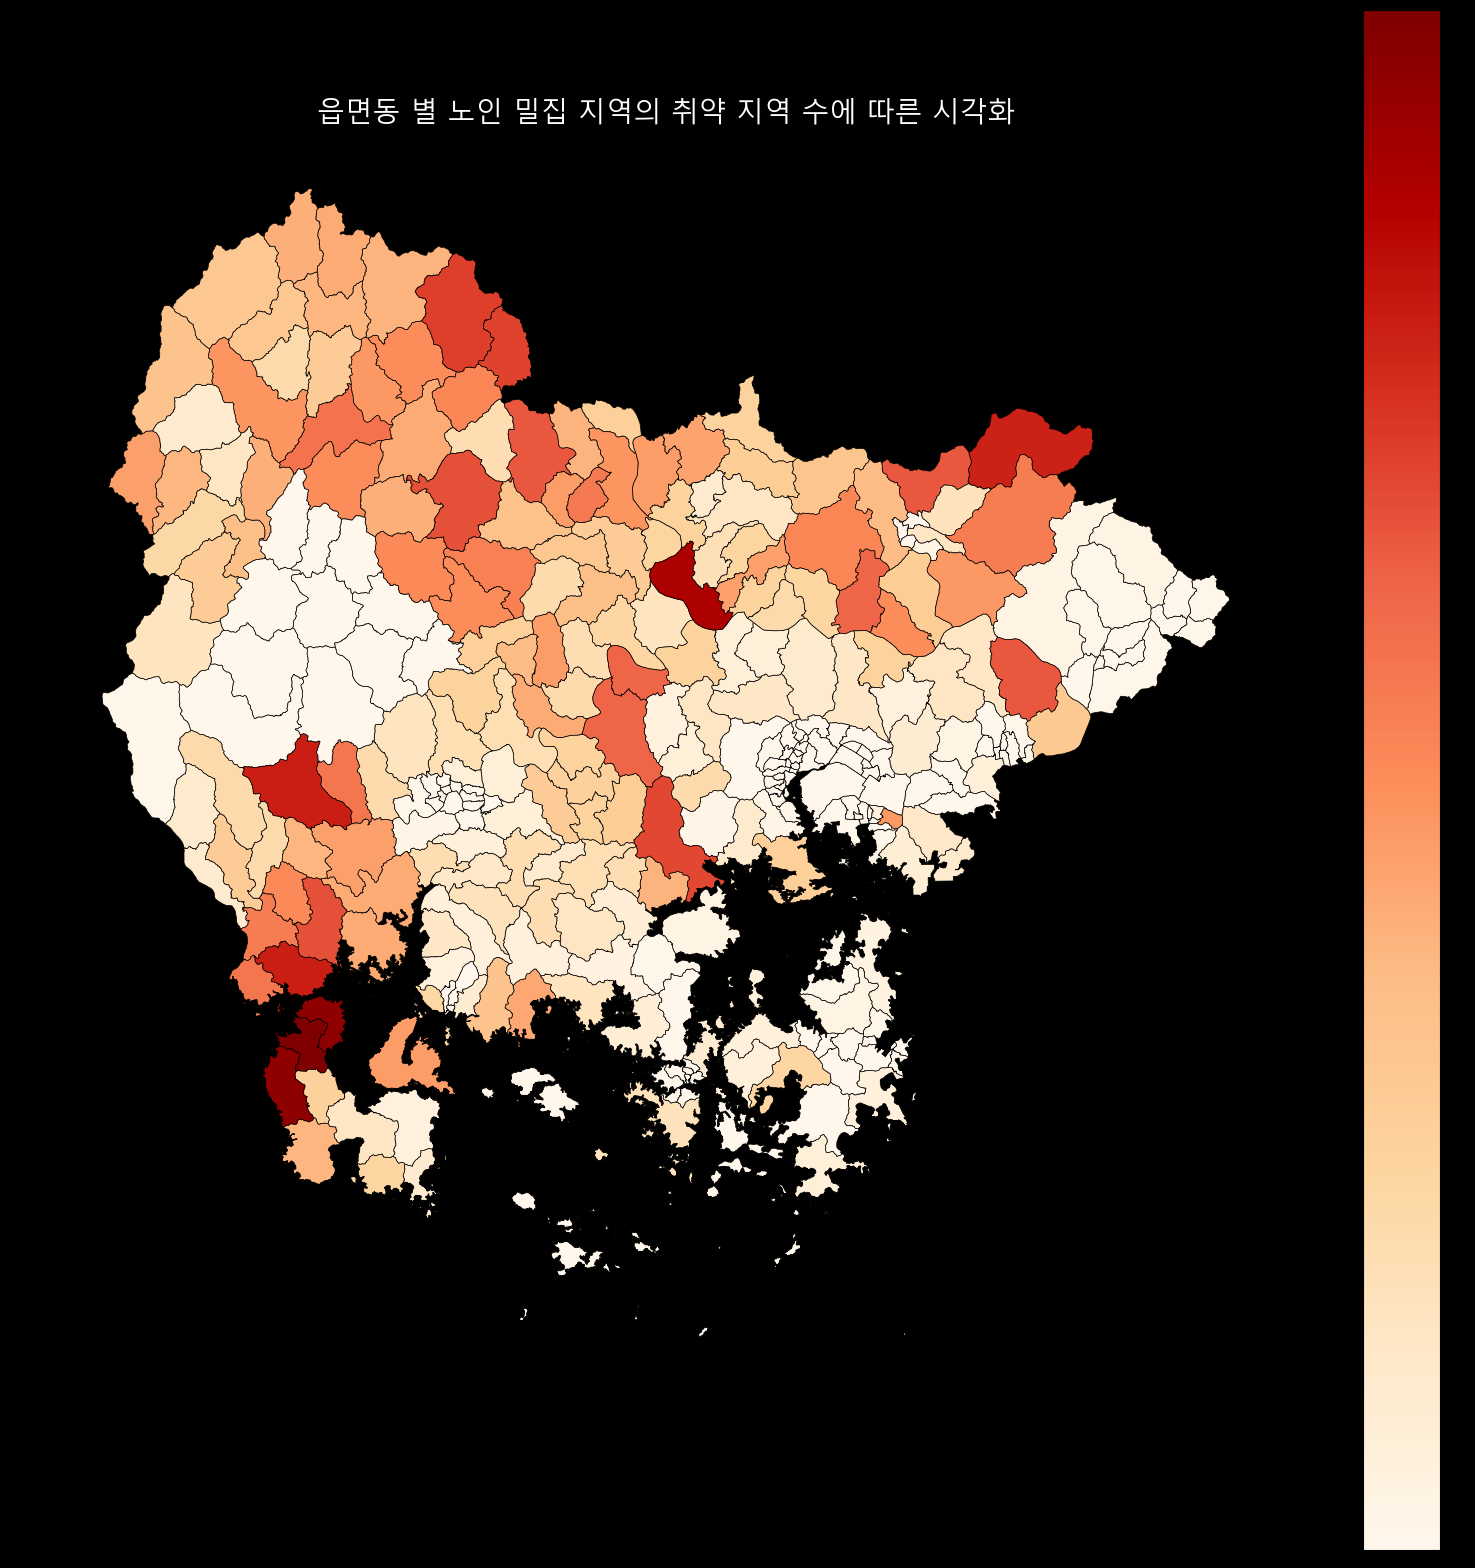

In [5]:
## 전체 count 확인하는 함수
visualizer.visualize_by_counts(
    column="silver_ADM_count", ## silver_ADM_count,	silver_SGG_count, facility_ADM_count, facility_SGG_count 중 하나 입력
    title_name="읍면동 별 노인 밀집 지역의 취약 지역 수에 따른 시각화"
)

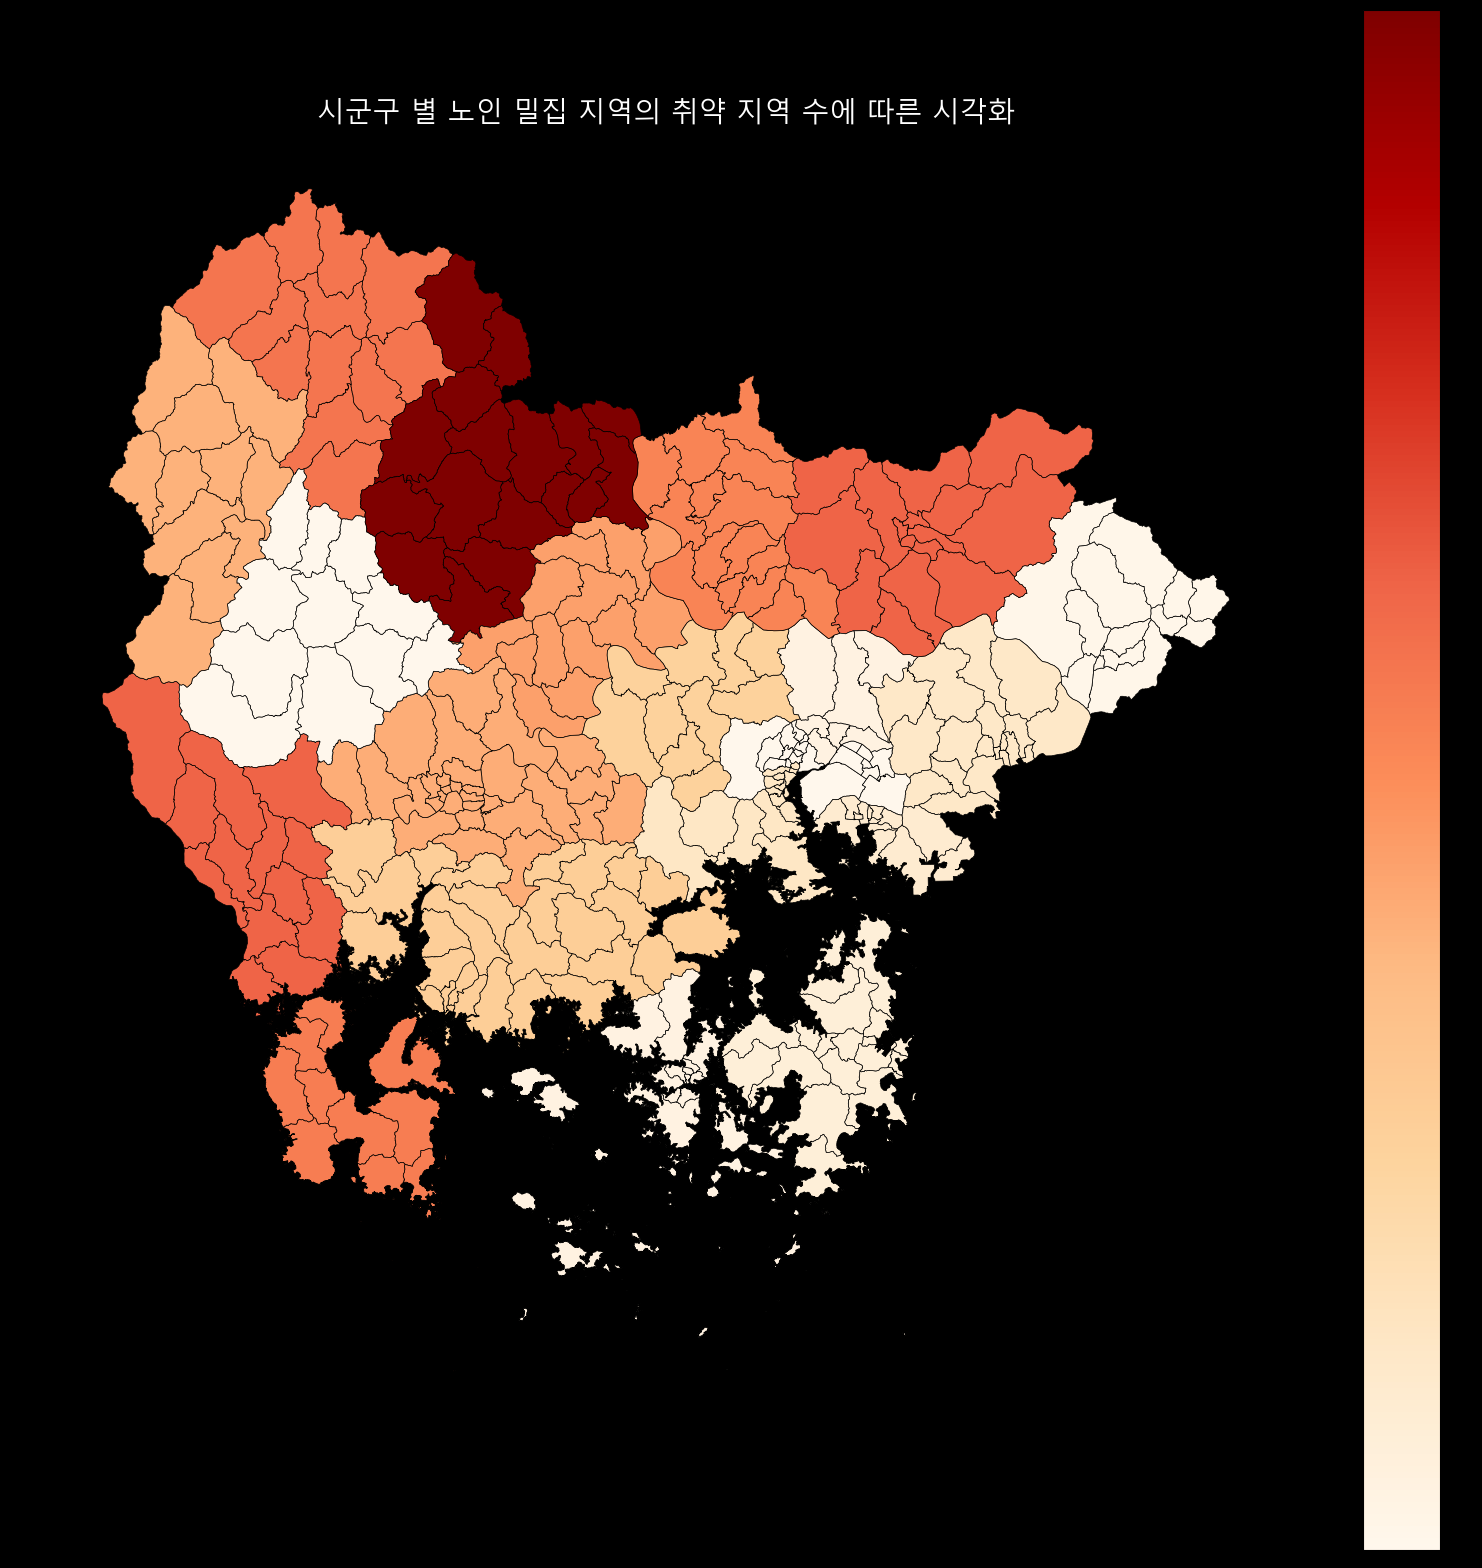

In [6]:
## 전체 count 확인하는 함수
visualizer.visualize_by_counts(
    column="silver_SGG_count", ## silver_ADM_count,	silver_SGG_count, facility_ADM_count, facility_SGG_count 중 하나 입력
    title_name="시군구 별 노인 밀집 지역의 취약 지역 수에 따른 시각화"
)

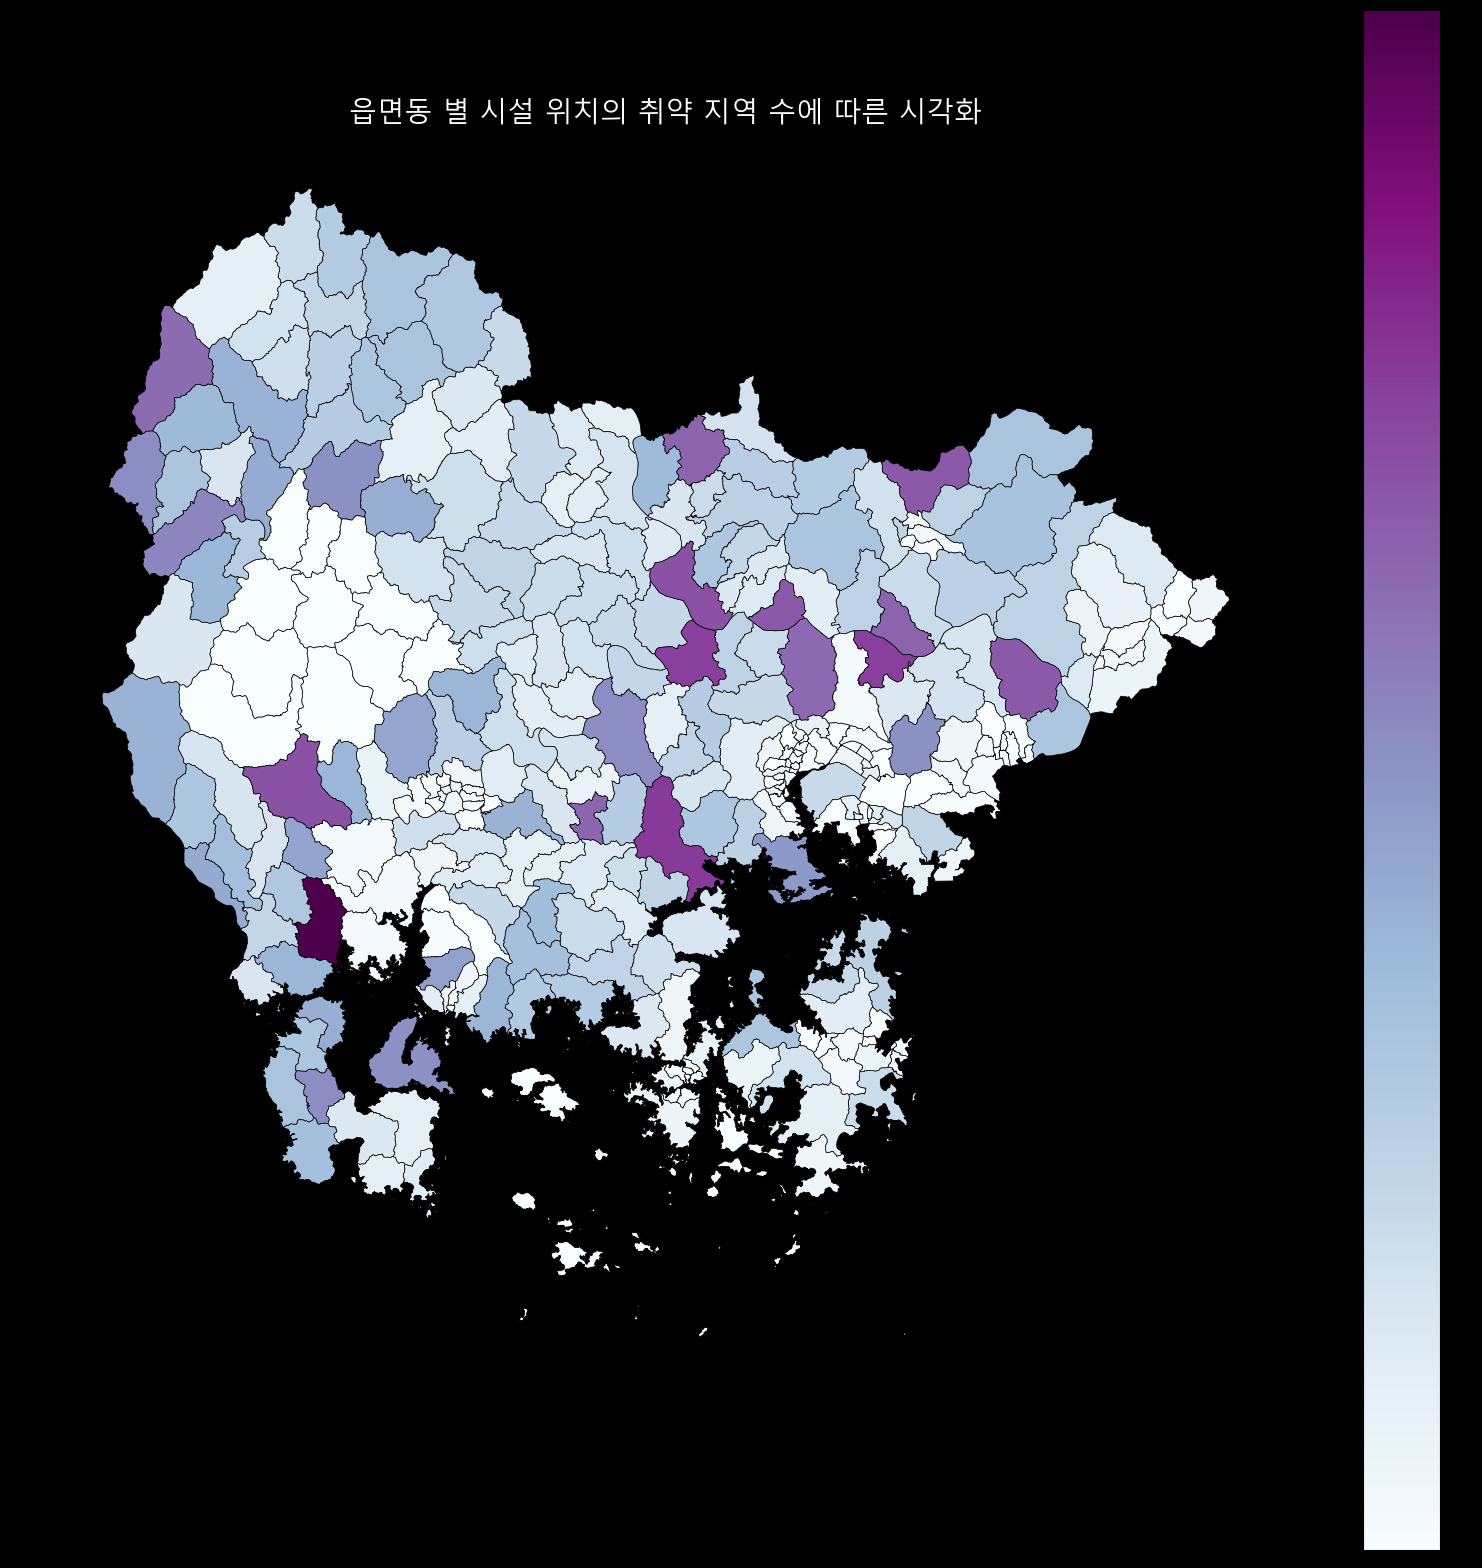

In [7]:
## 전체 count 확인하는 함수
visualizer.visualize_by_counts(
    column="facility_ADM_count", ## silver_ADM_count,	silver_SGG_count, facility_ADM_count, facility_SGG_count 중 하나 입력
    title_name="읍면동 별 시설 위치의 취약 지역 수에 따른 시각화"
)

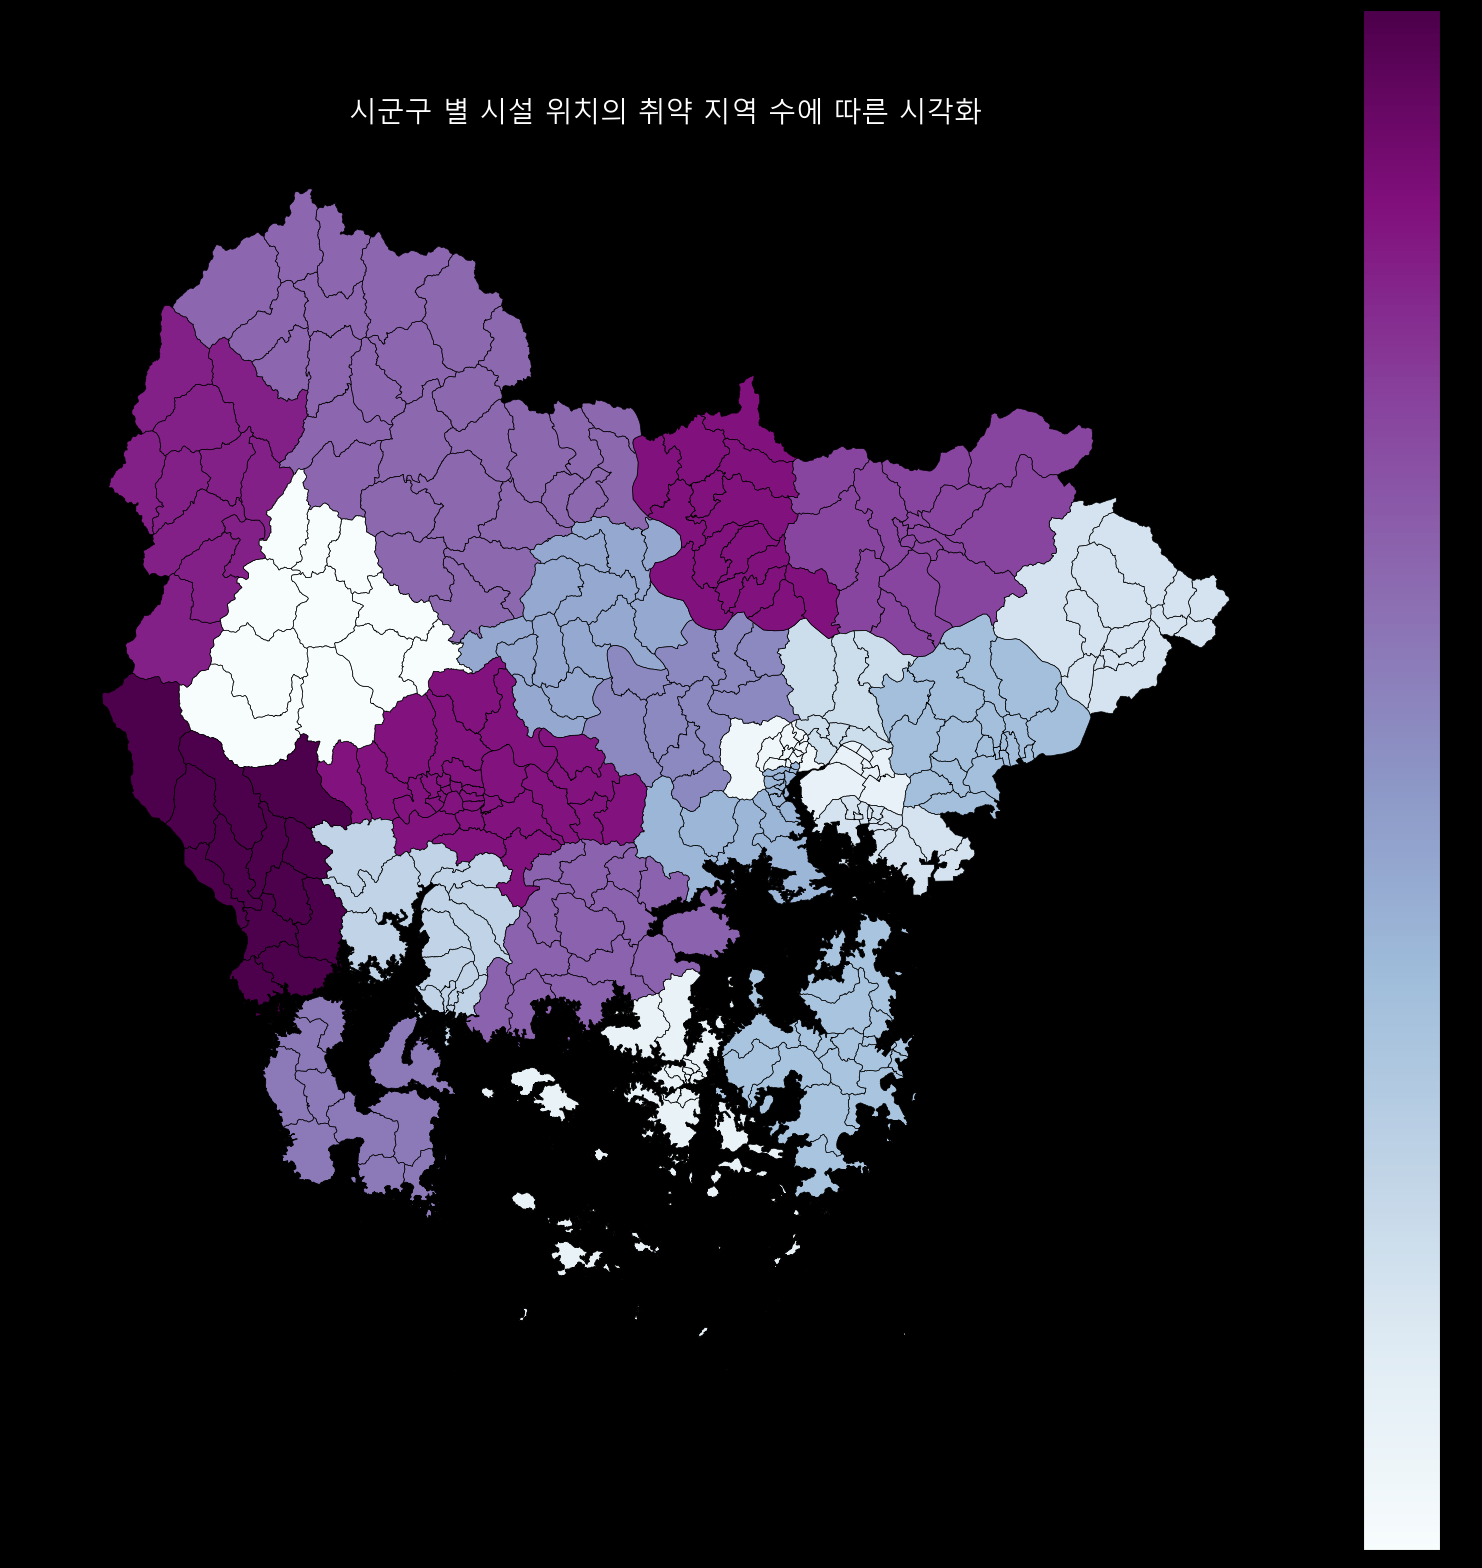

In [8]:
## 전체 count 확인하는 함수
visualizer.visualize_by_counts(
    column="facility_SGG_count", ## silver_ADM_count,	silver_SGG_count, facility_ADM_count, facility_SGG_count 중 하나 입력
    title_name="시군구 별 시설 위치의 취약 지역 수에 따른 시각화"
)

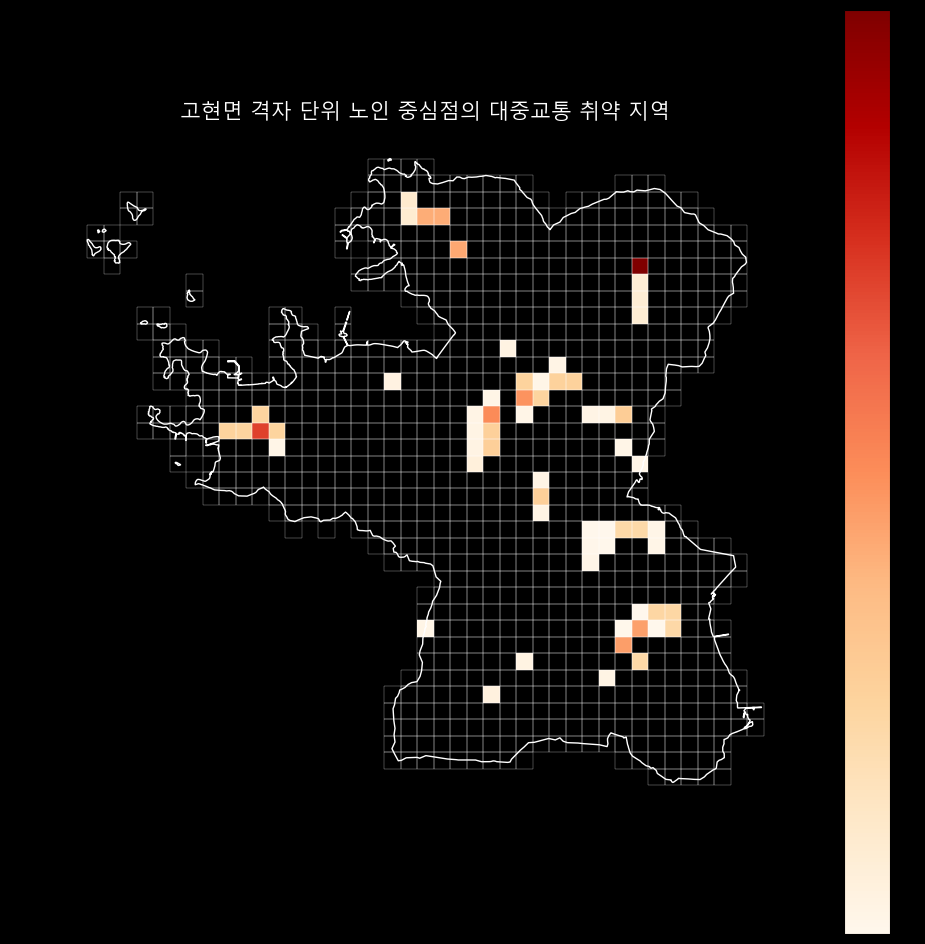

In [10]:
## 전체 count 확인하는 함수
visualizer.visualize_by_index(
    how = "emd", ## "emd", "sgg"
    on = "silver", ## "silver", "facility"
    cityname = "고현면",
    grid_size = 200,
    index_method = "reverse_log", 
    title_name="고현면 격자 단위 노인 중심점의 대중교통 취약 지역"
)